# Loan Eligibility Prediction

# 

## Import Necessary Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# 

## Load and Read the File

In [2]:
#Read file
file_path="N:\\Data Analytics Course\\Capstone Projects\\Loan Eligibility Prediction\\Loan_Data.csv"
df=pd.read_csv(file_path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#check the data characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

# 

## Data Description

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# 

## Data Visualization

In [7]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

N:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

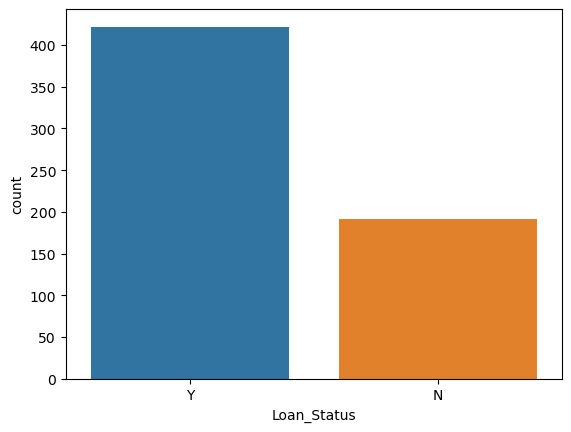

In [8]:
sns.countplot(df['Loan_Status'])

# 

In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
pd.crosstab(df['Loan_Status'],df['Gender'])

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


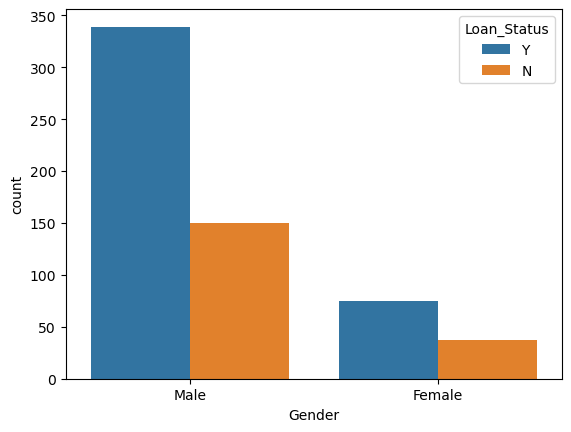

In [11]:
sns.countplot(hue = df.Loan_Status, x = df.Gender)
plt.show()

# 

In [12]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
pd.crosstab(df['Loan_Status'],df['Married'])

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,285


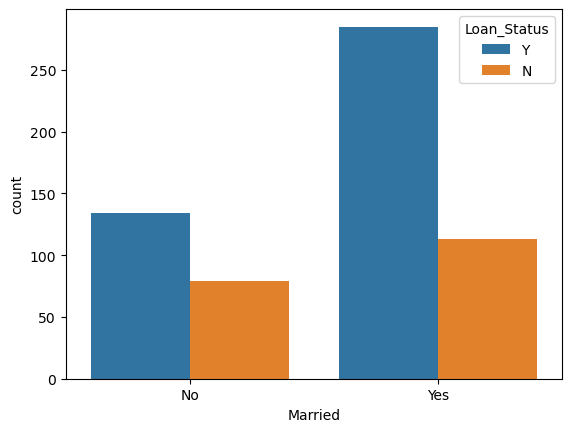

In [14]:
sns.countplot(hue = df.Loan_Status, x = df.Married)
plt.show()

# 

In [15]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
pd.crosstab(df['Loan_Status'],df['Education'])

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


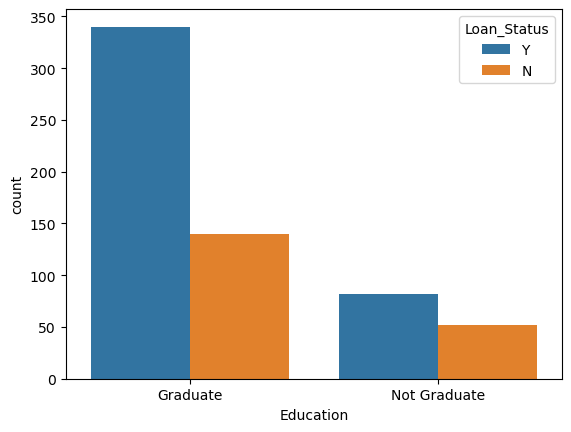

In [17]:
sns.countplot(hue = df.Loan_Status, x = df.Education)
plt.show()

# 

In [18]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
pd.crosstab(df['Loan_Status'],df['Self_Employed'])

Self_Employed,No,Yes
Loan_Status,,
N,157,26
Y,343,56


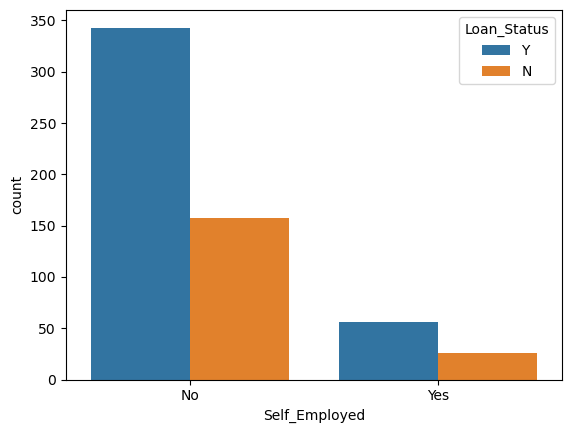

In [20]:
sns.countplot(hue = df.Loan_Status, x = df.Self_Employed)
plt.show()

# 

# 

In [21]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
pd.crosstab(df['Loan_Status'],df['Dependents'])

Dependents,0,1,2,3+
Loan_Status,,,,
N,107,36,25,18
Y,238,66,76,33


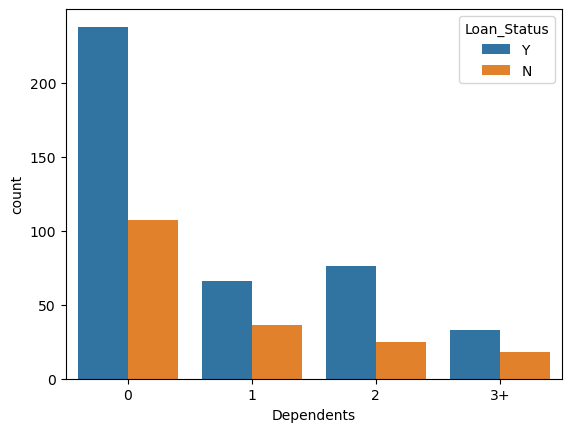

In [23]:
sns.countplot(hue = df.Loan_Status, x = df.Dependents)
plt.show()

# 

In [24]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [25]:
pd.crosstab(df['Loan_Status'],df['Property_Area'])

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,69,54,69
Y,110,179,133


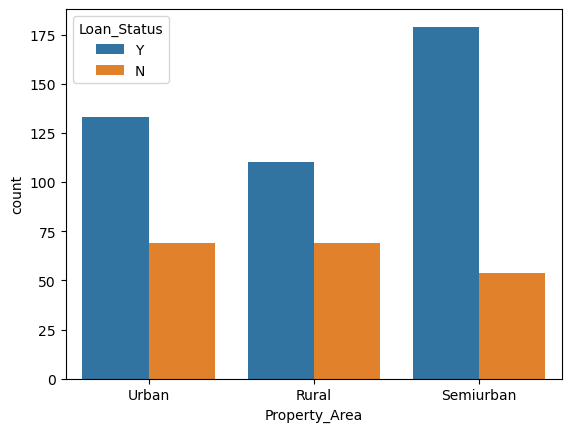

In [26]:
sns.countplot(hue = df.Loan_Status, x = df.Property_Area)
plt.show()

# 

## Check the Missing Values 

In [27]:
#get the missing values in the data frame
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
df.isnull().sum() / len(df) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# 

#### Dropping the Entire Rows of missing values since there are less missing values

In [29]:
#drop Na
df=df.dropna()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [30]:
#replace 3+ with 4
df['Dependents']=df['Dependents'].replace('3+',4)

In [31]:
#convert string to integer

df['Dependents']=df['Dependents'].astype(int)


In [32]:
#confirm the null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df.shape

(480, 13)

# 

#### Converting a String Column into Integer Column

In [34]:
#code the label column in to 1 and 0 with map function
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


# 

### Feature Encoding

In [35]:
#Apply label encoder on string columns to convert them in to numbers


df=df.drop('Loan_ID',axis=1)
cols=['Gender','Married','Education','Self_Employed','Property_Area']
for col in cols:
    df[col]=LabelEncoder().fit_transform(df[col])

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# 

#### Selecting the Input and Output Datasets

In [36]:
#set Y value
y=df['Loan_Status']
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [37]:
#set X column (set of features)
X=df.drop('Loan_Status',axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


# 

### Dividing the Data into Train and Test Data Sets

In [38]:
#creating train and test data sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 101)

In [39]:
#checking the shape of train and test data sets
print(X_train.shape)
print(X_test.shape)


(384, 11)
(96, 11)


# 

## Machine Learning Algorithms
##### Classifiers

### Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=60,max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=60)

In [42]:
y1_pred=rfc.predict(X_test)

In [43]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.56      0.34      0.43        29
           1       0.76      0.88      0.81        67

    accuracy                           0.72        96
   macro avg       0.66      0.61      0.62        96
weighted avg       0.70      0.72      0.70        96



In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y1_pred) *100

71.875

# 

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

N:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y2_pred = reg.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y2_pred)
cm

array([[ 9, 20],
       [ 4, 63]], dtype=int64)

In [49]:
clf = classification_report(y_test, y2_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.69      0.31      0.43        29
           1       0.76      0.94      0.84        67

    accuracy                           0.75        96
   macro avg       0.73      0.63      0.63        96
weighted avg       0.74      0.75      0.72        96



In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y2_pred) *100

75.0

### Logistic Regression with 2000 iterations

In [51]:
#model 3 with logisticRegression
model3=LogisticRegression(max_iter=2000)
model3.fit(X_train,y_train)
ts_pred=model3.predict(X_test)
print(classification_report(y_test,ts_pred))

              precision    recall  f1-score   support

           0       0.90      0.31      0.46        29
           1       0.77      0.99      0.86        67

    accuracy                           0.78        96
   macro avg       0.83      0.65      0.66        96
weighted avg       0.81      0.78      0.74        96



In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ts_pred) *100

78.125

# 

### Hist Gradient Boosting Classifier

In [53]:
#model 2 with HistGradientBoostingClassifier

model2=HistGradientBoostingClassifier(max_iter=700,learning_rate=0.02)
model2.fit(X_train,y_train)

HistGradientBoostingClassifier(learning_rate=0.02, max_iter=700)

In [54]:
y3_pred=model2.predict(X_test)

In [55]:
print(classification_report(y_test,y3_pred))

              precision    recall  f1-score   support

           0       0.69      0.31      0.43        29
           1       0.76      0.94      0.84        67

    accuracy                           0.75        96
   macro avg       0.73      0.63      0.63        96
weighted avg       0.74      0.75      0.72        96



In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y3_pred) *100

75.0

# 

### Decision Tree Classifier

#### Gini Index

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y4_pred = dt.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, y4_pred)
cm

array([[14, 15],
       [21, 46]], dtype=int64)

In [60]:
clf = classification_report(y_test, y4_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.40      0.48      0.44        29
           1       0.75      0.69      0.72        67

    accuracy                           0.62        96
   macro avg       0.58      0.58      0.58        96
weighted avg       0.65      0.62      0.63        96



In [61]:
accuracy_score(y_test, y4_pred) *100

62.5

# 

#### ID3 Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
y5_pred = dt.predict(X_test)

In [64]:
accuracy_score(y_test, y5_pred) *100

75.0

# 

### Naive Bayes Classifier

In [65]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [66]:
y6_pred = nb.predict(X_test)

In [67]:
accuracy_score(y6_pred, y_test) * 100

50.0

# 

### KNN Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y7_pred = knn.predict(X_test)

N:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
accuracy_score(y7_pred, y_test) * 100

64.58333333333334

# 

In [71]:
X.shape

(480, 11)

In [72]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

X_pca = pca.fit_transform(X)

X_pca.shape

(480, 2)

In [73]:
pca.n_components_

2

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 101)

In [75]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6979166666666666

# 

### For this Loan Eligibility prediction Dataset Logistic Regression has produced highest Accuracy which is around 78%(78.125).